In [1]:
import pandas as pd
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

Automatically created module for IPython interactive environment


'max:2014-12-31, min:2014-01-01'

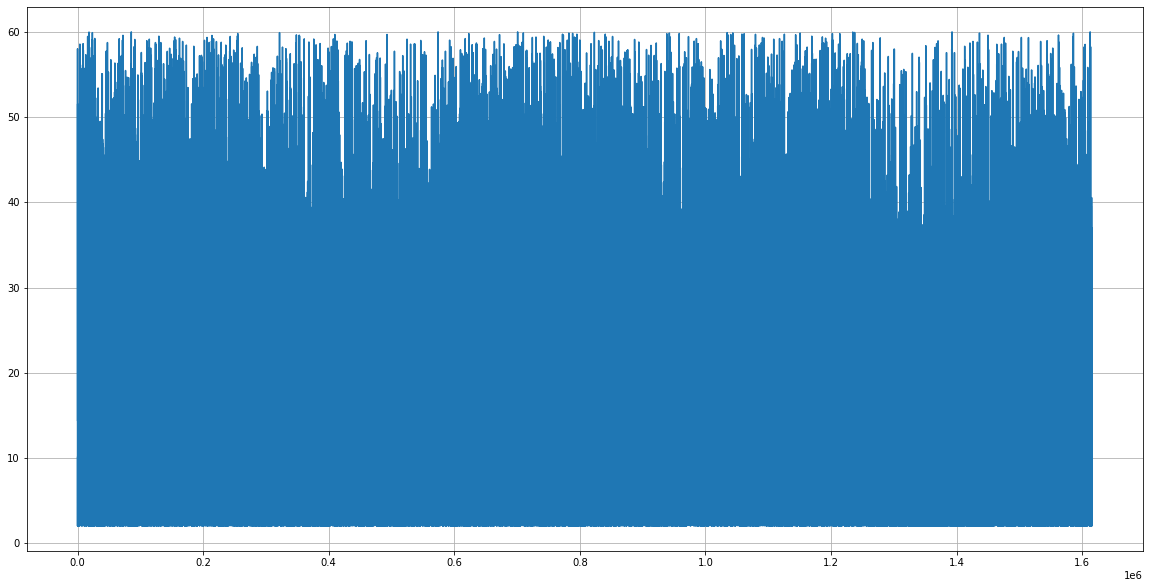

In [2]:
df2014 = pd.read_csv('data_2014-1.csv')

df2014['startdate'].unique().shape

df2014['tripduration'].plot(figsize=(20,10), grid=True)

'max:{}, min:{}'.format(df2014.startdate.max(),df2014.startdate.min())

<AxesSubplot:>

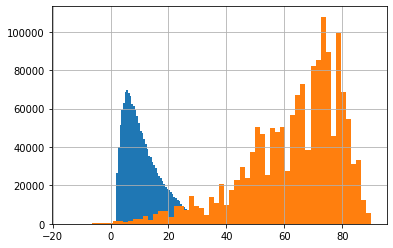

In [3]:
### `df1To2` : 2014 - all data between first, and second months

df1To2 = df2014[ (df2014.month >= 1) & (df2014.month < 12) ]
cols = ['temperature','tripduration']

df1To2['tripduration'].hist(bins=100)
df1To2['temperature'].hist(bins=60)

In [4]:
### Sampling Data, 100 rows

col = ['temperature','tripduration','starttime']
dfs = df1To2[col].head(100)

In [5]:
### Raw Sequence plots: (temperature, tripduration)

col = ['temperature','tripduration']
arr = dfs[col].to_numpy()

col = ['temperature','tripduration']
mxs = MinMaxScaler()
dfs[col] = mxs.fit_transform(dfs[col])

In [6]:
## Reshaping the running a basic LSTM model

col = ['temperature','tripduration']
arr = dfs[col].to_numpy()

arr.shape

Xt = dfs['temperature'].to_numpy()
Xt.shape

(100,)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional, Conv1D, Dropout
import tensorflow as tf

## Model with real data

In [8]:
x = dfs['temperature'].to_numpy()
y = dfs['tripduration'].to_numpy()
print('Xt:{}, \tyt: {}'.format(x.shape, y.shape))

Xt:(100,), 	yt: (100,)


In [9]:
xi = dfs['temperature'].to_numpy()
yi = dfs['tripduration'].to_numpy()
xi = xi.reshape((10,10,1))
    
    
larr = []

m = Sequential()

L = Conv1D(100, 2, use_bias=True)
larr.append(L)

L = Dropout(0.2)
larr.append(L)

L = Dense(10)
larr.append(L)

L = LSTM(10)
larr.append(L)

L = Dropout(0.2)
larr.append(L)



In [10]:
for e in larr: m.add(e)
m.compile(optimizer='adam',loss='mse')
h = m.fit(xi, yi, validation_split=0.2, epochs=100, verbose=0)
yp = m.predict(xi)
print(yp.shape)

(10, 10)


dict_keys(['loss', 'val_loss'])


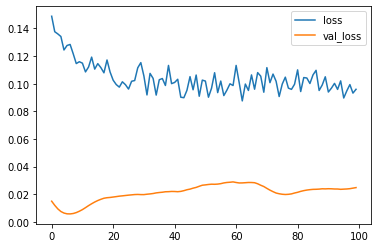

<Figure size 432x288 with 0 Axes>

In [11]:
print(h.history.keys())

import matplotlib.pyplot as plt

plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend(['train','test'],loc='upper left')
plt.legend()
plt.show()
plt.savefig('model-2-loss.jpg', dpi=300)

In [12]:
yp = m.predict(xi)
yp.shape

(10, 10)

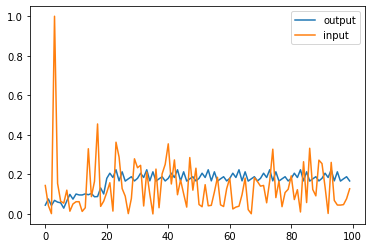

In [13]:
import matplotlib.pyplot as plt

y = yp.flatten()
N = len(yp.flatten())
x = np.arange(N)
fig, ax = plt.subplots()
ax.plot(x,y,label='output')
ax.plot(x,dfs['tripduration'],label='input')
ax.legend()

plt.savefig('model-2-output.jpg', dpi=300)

<br>